# 4.10 Coding Etiquette & Excel Reporting
# 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook

In [1]:
#import libraries
import pandas as pd 
import numpy as np 
import os

In [2]:
path = r'C:\Users\Nurse Blum\Instacart Basket Analysis'
path

'C:\\Users\\Nurse Blum\\Instacart Basket Analysis'

In [3]:
cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
cust_merged.shape

(28667038, 37)

In [5]:
cust_merged['state'].value_counts(dropna = False)

California              592026
Pennsylvania            590984
Rhode Island            582617
Georgia                 582156
Arizona                 581057
North Carolina          579454
Oklahoma                576801
Minnesota               575022
New Mexico              572814
Alaska                  571588
Maine                   571504
Wyoming                 571083
Massachusetts           570996
Arkansas                569230
Mississippi             568091
Texas                   567001
North Dakota            566488
Nevada                  566369
Missouri                566145
Virginia                565354
Washington              563909
South Carolina          563754
South Dakota            563646
Kansas                  563455
Louisiana               563413
Alabama                 563299
New York                562594
Montana                 562121
Kentucky                561882
Colorado                561794
Michigan                561698
Delaware                560605
Oregon  

In [6]:
cust_merged['department_id'].unique()

array(['7', '19', '4', '14', '16', '13', '17', '1', '9', '15', '3', '20',
       '11', '12', '6', '5', '21', '8', '18', '2', '10'], dtype=object)

# 3. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [7]:
# 3. create region column 
result = []

for value in cust_merged['state']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey', 'District of Columbia']:
    result.append('Region 1')
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append('Region 2')
  elif value in ['Delaware', 'Maryland', 'Distric of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida','Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result.append('Region 3')
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    result.append('Region 4')
  else:
    result.append('Other Region')


In [8]:
cust_merged['Region'] = result

In [9]:
cust_merged['Region'].value_counts(dropna = False)

Region 3    9007841
Region 4    7333040
Region 2    6713974
Region 1    5612183
Name: Region, dtype: int64

In [10]:
#Cross Regions with spend_flag
pd.crosstab(cust_merged['Region'], cust_merged['spend_flag'])

spend_flag,High spender,Low spender
Region,,
Region 1,107770,5504413
Region 2,142511,6571463
Region 3,173120,8834721
Region 4,138778,7194262


<Axes: title={'center': 'Spending by Region'}, xlabel='Customers', ylabel='Region'>

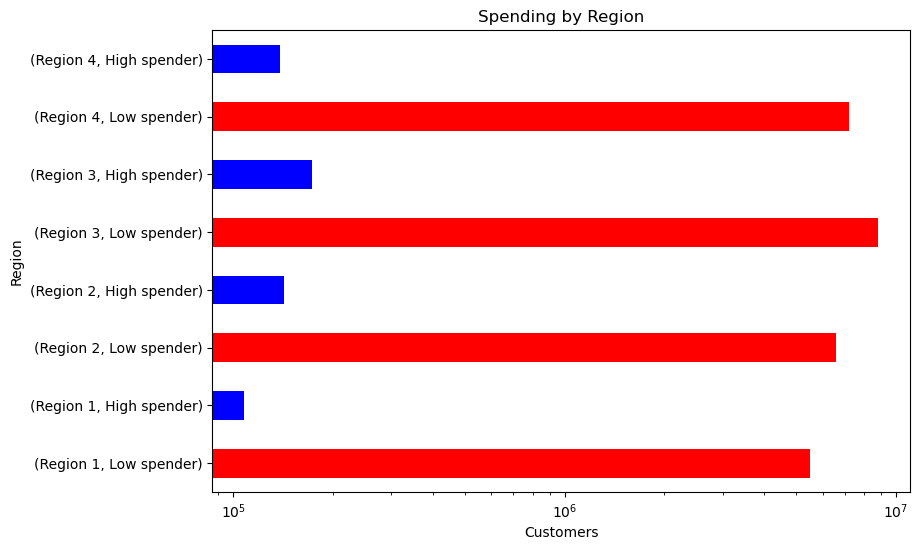

In [11]:
bar1_reg_spend = cust_merged.groupby('Region')['spend_flag'].value_counts().plot(kind= 'barh', \
                        color = ['red', 'blue'], title='Spending by Region', xlabel='Customers', \
                        ylabel='Region', logx=True, figsize=(9,6))
                        
bar1_reg_spend

### The majority of customers in all regions are low spenders. The highest number of low spenders is in region 3. The highest number of high spenders are also in region 3.

# 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [12]:
def exclusion_flag(row):
    
  if row['order_number'] < 5:
    return 'yes'
  elif row['order_number'] >= 5:
    return 'no'
  else: return 'N\A'

In [13]:
cust_merged['yes'] = cust_merged.apply(exclusion_flag, axis = 1)

In [14]:
cust_merged['yes'].value_counts(dropna = False)

no     23076100
yes     5590938
Name: yes, dtype: int64

In [15]:
cust_merged['yes'].to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'exclusion_flag.pkl'))

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [16]:
# Create age_category
cust_merged['age'].describe()

count    2.866704e+07
mean     4.947310e+01
std      1.847839e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Ranges for age_flag:  
Senior = 60+   
Older_Adult = 41-60   
Middle_Age = 25-40   
Young_Adult = 18-24  

In [17]:
cust_merged.loc[(cust_merged['age'] >= 18) & (cust_merged['age'] < 25), 'age_category'] = 'young_adult'
cust_merged.loc[(cust_merged['age'] >= 25) & (cust_merged['age'] < 40), 'age_category'] = 'middle_age'
cust_merged.loc[(cust_merged['age'] >= 40) & (cust_merged['age'] < 60), 'age_category'] = 'older_adult'
cust_merged.loc[cust_merged['age'] >= 60, 'age_category'] = 'Senior'

In [18]:
cust_merged['age_category'].value_counts()

Senior         9791687
older_adult    9004602
middle_age     6705140
young_adult    3165609
Name: age_category, dtype: int64

<Axes: title={'center': 'Number of Customers per Age Category'}, xlabel='Customers', ylabel='Age Categories'>

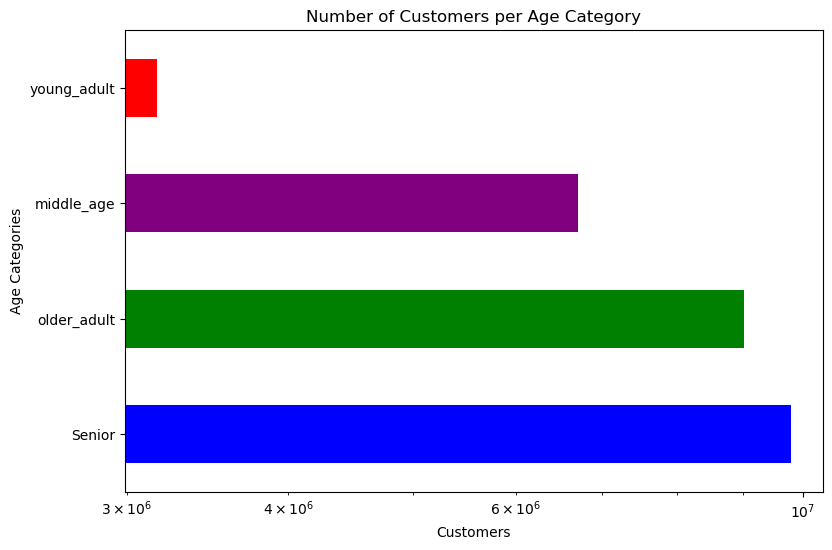

In [19]:
barh_cust_per_age = cust_merged['age_category'].value_counts().plot(kind = 'barh', color = ['blue', 'green', 'purple', 'red'],
                title='Number of Customers per Age Category', xlabel='Customers', \
                ylabel='Age Categories', logx=True, figsize=(9,6))
barh_cust_per_age

In [20]:
# Create income category
cust_merged['income'].describe()

count    2.866704e+07
mean     9.956272e+04
std      4.311820e+04
min      2.590300e+04
25%      6.719100e+04
50%      9.666100e+04
75%      1.280070e+05
max      5.939010e+05
Name: income, dtype: float64

 Income Categories in three segments:
        
-Low income is < 59,999 
          
-Middle income is 60,000 - 134,999
                 
-Upper income is >135,000  

In [21]:
# Create income category
cust_merged.loc[cust_merged['income'] <= 59999, 'income_category'] = 'Low_income'
cust_merged.loc[(cust_merged['income'] >= 60000) & (cust_merged['income'] <= 134999), 'income_category'] = 'Middle_income'
cust_merged.loc[cust_merged['income'] >= 135000, 'income_category'] = 'Upper_income'

In [22]:
cust_merged['income_category'].value_counts()

Middle_income    17259258
Upper_income      6001278
Low_income        5406502
Name: income_category, dtype: int64

<Axes: title={'center': 'Income Categories of Customers'}, xlabel='Customers', ylabel='Income Categories'>

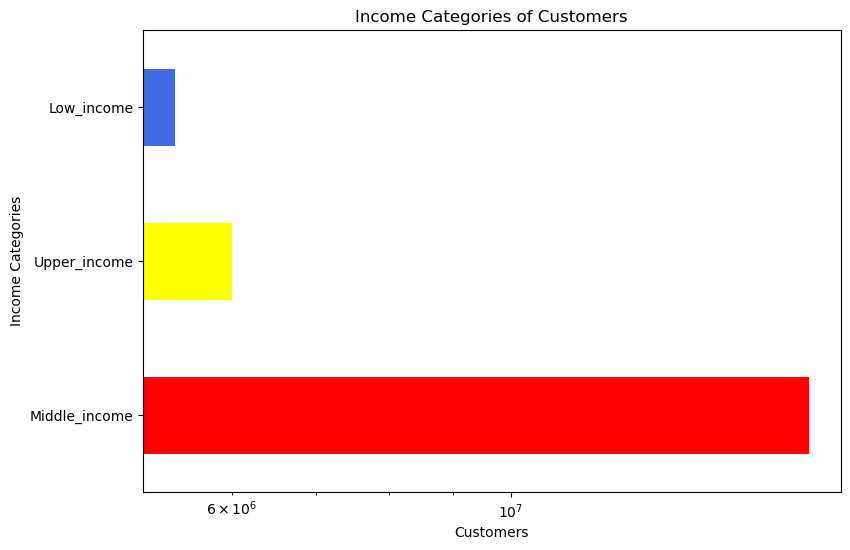

In [23]:
barh_income_cust = cust_merged['income_category'].value_counts().plot(kind = 'barh', color = ['red', 'yellow', 'royalblue'],
                         title='Income Categories of Customers', xlabel='Customers', \
                        ylabel='Income Categories', logx=True, figsize=(9,6))
barh_income_cust

In [24]:
cust_merged['dependants'].describe()

count    2.866704e+07
mean     1.501768e+00
std      1.118521e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: dependants, dtype: float64

"Dependants" stands for the number of children per customer. There will be three categories.  
No children = 0  
Few children = 1 to 2  
Many children = 3 or more  

In [25]:
# Create dependents category 

cust_merged.loc[cust_merged['dependants'] == 0, 'dependants_category'] = 'No Children'
cust_merged.loc[cust_merged['dependants'].isin([1, 2]), 'dependants_category'] = 'Few children'
cust_merged.loc[cust_merged['dependants'] >= 3, 'dependants_category'] = 'Many children'

In [26]:
cust_merged['dependants_category'].value_counts()

Few children     14317868
Many children     7189086
No Children       7160084
Name: dependants_category, dtype: int64

<Axes: title={'center': 'Dependant Categories of Customers'}, xlabel='Customers', ylabel='Dependant Categories'>

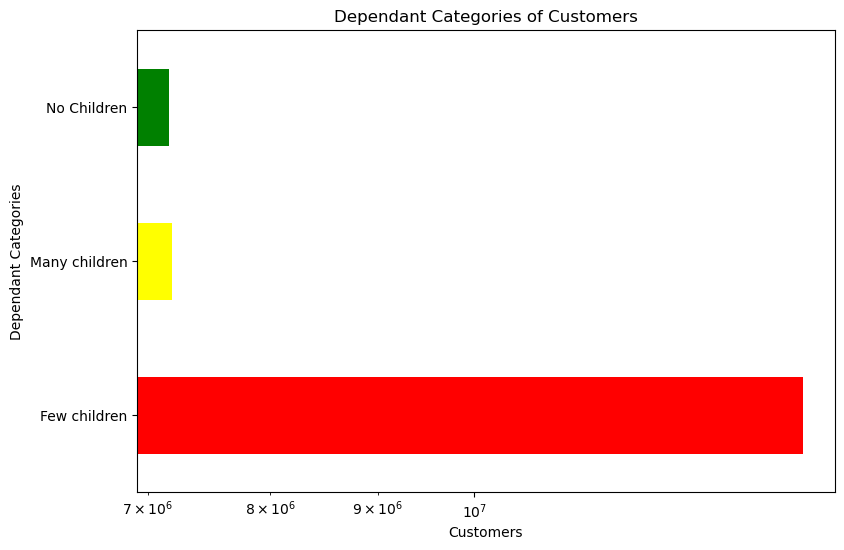

In [27]:
barh_dpend_cust = cust_merged['dependants_category'].value_counts().plot(kind = 'barh', color = ['red', 'yellow', 'green'],
                        title='Dependant Categories of Customers', xlabel='Customers', \
                        ylabel='Dependant Categories', logx=True, figsize=(9,6))
barh_dpend_cust

Customers who have 1 to 2 children make up the greater number of customers who are ordering products.

In [28]:
# Profile certain goods from department_id column
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled'), index_col = False)

In [29]:
df_dep.shape

(21, 2)

In [30]:
df_dep


,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [31]:
df_dep.head(10)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [32]:
df_dep.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [33]:
df_dep.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [34]:
cust_merged['department_id'].dtype

dtype('O')

In [35]:
cust_merged['department_id'] = cust_merged['department_id'].astype('int64')

In [36]:
cust_merged = cust_merged.merge(df_dep, on = ['department_id'])

In [37]:
cust_merged.head(5)

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,date_joined,dependants,marital_status,income,Region,yes,age_category,income_category,dependants_category,department
0,1,1,2398795,1,2,3,7,15.0,196,1,...,2/17/2019,3,married,40423,Region 3,yes,middle_age,Low_income,Many children,beverages
1,2,2,473747,1,3,3,12,21.0,196,1,...,2/17/2019,3,married,40423,Region 3,yes,middle_age,Low_income,Many children,beverages
2,3,3,2254736,1,4,4,7,29.0,196,1,...,2/17/2019,3,married,40423,Region 3,yes,middle_age,Low_income,Many children,beverages
3,4,4,431534,1,5,4,15,28.0,196,1,...,2/17/2019,3,married,40423,Region 3,no,middle_age,Low_income,Many children,beverages
4,5,5,3367565,1,6,2,7,19.0,196,1,...,2/17/2019,3,married,40423,Region 3,no,middle_age,Low_income,Many children,beverages


In [38]:
cust_merged['department_id'].unique()

array([ 7, 19,  4, 14, 16, 13, 17,  1,  9, 15,  3, 20, 11, 12,  6,  5, 21,
        8, 18,  2, 10], dtype=int64)

### Customers who purchase baby products

In [39]:
cust_merged.loc[cust_merged['department'] =='babies', 'baby_purchase'] = 'Yes'
cust_merged.loc[cust_merged['department'] !='babies', 'baby_purchase'] = 'No'

In [40]:
cust_merged['baby_purchase'].value_counts()

No     28288083
Yes      378955
Name: baby_purchase, dtype: int64

### Customers who purchase household products

In [90]:
cust_merged.loc[cust_merged['department'] =='meat seafood', 'meat_sea_purchase'] = 'Yes'
cust_merged.loc[cust_merged['department'] !='meat seafood', 'meat_sea_purchase'] = 'No'

In [92]:
cust_merged['meat_sea_purchase'].value_counts()

No     28040637
Yes      626401
Name: meat_sea_purchase, dtype: int64

### Customers who purchase dairy eggs

In [93]:
cust_merged.loc[cust_merged['department'] =='international', 'international_purchase'] = 'Yes'
cust_merged.loc[cust_merged['department'] !='international', 'international_purchase'] = 'No'

In [94]:
cust_merged['international_purchase'].value_counts()
                    

No     28430287
Yes      236751
Name: international_purchase, dtype: int64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [46]:
# Order_hour_of_day
cust_merged['order_hour_of_day'].value_counts()

10    2451178
11    2424219
14    2380522
15    2354663
13    2352579
12    2310466
16    2237644
9     2185110
17    1838100
8     1533008
18    1434935
19    1105676
20     858891
7      797680
21     706076
22     559204
23     353531
6      260228
0      192226
1      102136
5       78312
2       60115
4       45868
3       44671
Name: order_hour_of_day, dtype: int64

### Hour category of the day  
#### -Day: 7:00am - 5:00pm  
#### -Evening: 6:00pm - 10:00pm  
####  -Night: 11:00pm - 6:00am

In [47]:
cust_merged.loc[cust_merged['order_hour_of_day'].isin([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,]), 'time_of_order'] = 'Day'
cust_merged.loc[cust_merged['order_hour_of_day'].isin([18, 19, 20, 21, 22]), 'time_of_order'] = 'Evening'
cust_merged.loc[cust_merged['order_hour_of_day'].isin([23, 0, 1, 2, 3, 4, 5, 6]), 'time_of_order'] = 'Night'

In [48]:
cust_merged['time_of_order'].value_counts()

Day        22865169
Evening     4664782
Night       1137087
Name: time_of_order, dtype: int64

<Axes: title={'center': 'Time of Order Categories'}, xlabel='Frequency (millions)'>

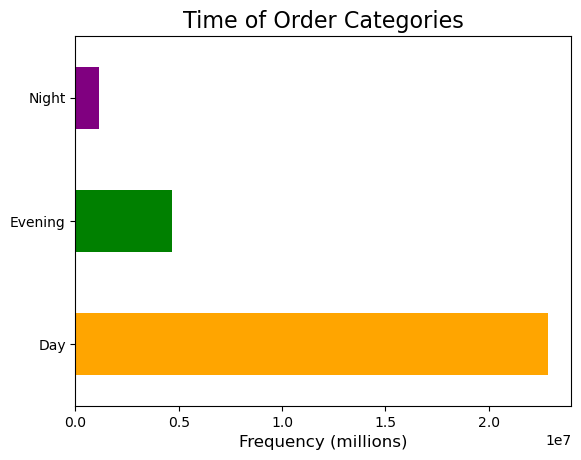

In [49]:
# Bar chart of time of orders
bar_time = cust_merged['time_of_order'].value_counts().plot(kind='barh', color = ['orange', 'green', 'purple'])
plt.title("Time of Order Categories", fontsize = '16')
plt.xlabel('Frequency (millions)',  fontsize = 12)
bar_time

In [50]:
cust_merged.head(5)

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,Region,yes,age_category,income_category,dependants_category,department,baby_purchase,household_purchase,dairy_eggs_purchase,time_of_order
0,1,1,2398795,1,2,3,7,15.0,196,1,...,Region 3,yes,middle_age,Low_income,Many children,beverages,No,No,No,Day
1,2,2,473747,1,3,3,12,21.0,196,1,...,Region 3,yes,middle_age,Low_income,Many children,beverages,No,No,No,Day
2,3,3,2254736,1,4,4,7,29.0,196,1,...,Region 3,yes,middle_age,Low_income,Many children,beverages,No,No,No,Day
3,4,4,431534,1,5,4,15,28.0,196,1,...,Region 3,no,middle_age,Low_income,Many children,beverages,No,No,No,Day
4,5,5,3367565,1,6,2,7,19.0,196,1,...,Region 3,no,middle_age,Low_income,Many children,beverages,No,No,No,Day


In [51]:
# Marital status
cust_merged['marital_status'].value_counts()

married                             20129647
single                               4698069
divorced/widowed                     2462015
living with parents and siblings     1377307
Name: marital_status, dtype: int64

<Axes: title={'center': 'Marital Status of Customers'}, xlabel='Number of Customers (millions)'>

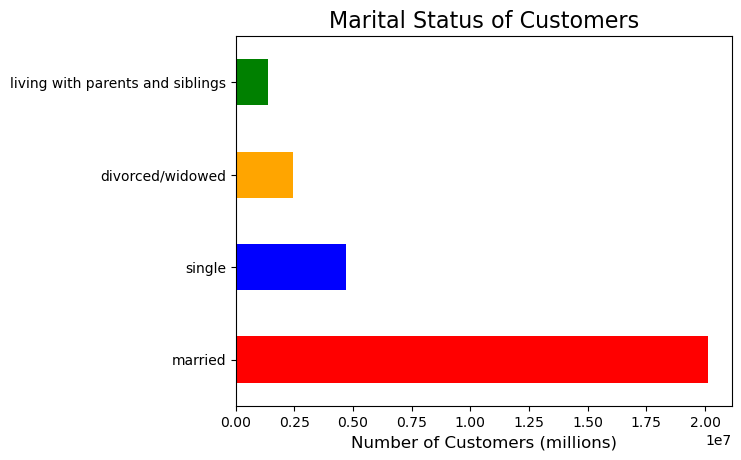

In [52]:
# Bar chart of marital status
bar_mar = cust_merged['marital_status'].value_counts().plot(kind='barh', color = ['red', 'blue', 'orange', 'green'])
plt.title("Marital Status of Customers", fontsize = '16')
plt.xlabel('Number of Customers (millions)',  fontsize = 12)
bar_mar

<Axes: title={'center': 'Time of Orders and Marital Status'}, xlabel='Number of Customers', ylabel='Time and Status'>

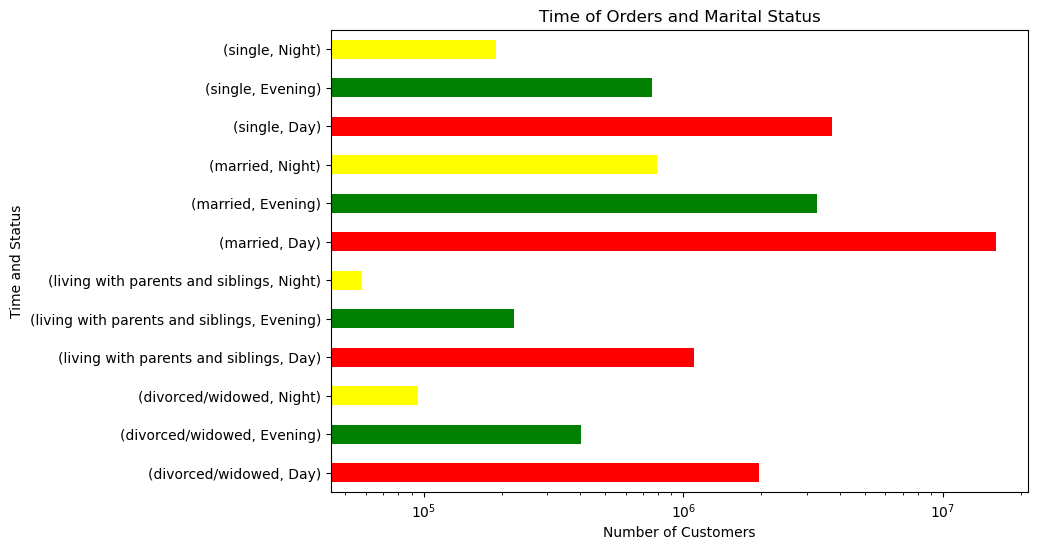

In [53]:
# Bar chart to show time of orders based on marital status
barh_mar_time = cust_merged.groupby('marital_status')['time_of_order'].value_counts().plot(kind= 'barh', \
                        color = ['red', 'green', 'yellow'], title='Time of Orders and Marital Status', xlabel='Number of Customers', \
                        ylabel='Time and Status', logx=True, figsize=(9,6))
barh_mar_time

### The majority of orders take place in the daytime hours regardless of the marital status. The evening hours is the second most popular time to order products. The night time orders are the highest amounst married couples. 

In [54]:
# Orders based on the day of the week
cust_merged['orders_day_of_week'].value_counts()

0    5463716
1    5017507
6    3958104
5    3735549
2    3732216
3    3401483
4    3358463
Name: orders_day_of_week, dtype: int64

In [55]:
cust_merged.loc[cust_merged['orders_day_of_week'] == 0, 'day_of_week'] = 'Sunday'
cust_merged.loc[cust_merged['orders_day_of_week'] == 1, 'day_of_week'] = 'Monday'
cust_merged.loc[cust_merged['orders_day_of_week'] == 2, 'day_of_week'] = 'Tuesday'
cust_merged.loc[cust_merged['orders_day_of_week'] == 3, 'day_of_week'] = 'Wednesday'
cust_merged.loc[cust_merged['orders_day_of_week'] == 4, 'day_of_week'] = 'Thursday'
cust_merged.loc[cust_merged['orders_day_of_week'] == 5, 'day_of_week'] = 'Friday'
cust_merged.loc[cust_merged['orders_day_of_week'] == 6, 'day_of_week'] = 'Saturday'

<Axes: title={'center': 'Day of the Week Orders'}, xlabel='Frequency (millions)'>

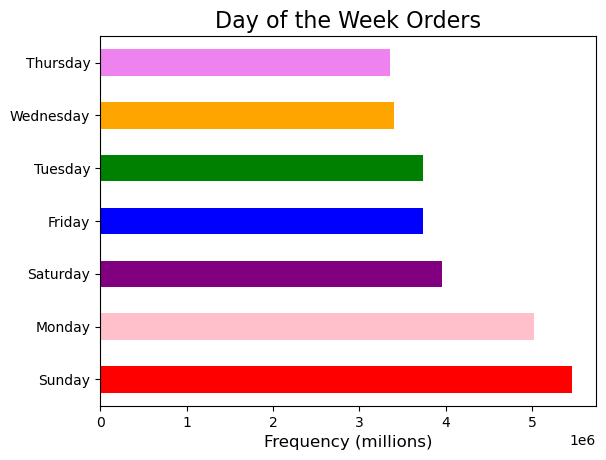

In [56]:
# Bar chart for orders per day of the week
# Bar chart of time of orders
bar_day = cust_merged['day_of_week'].value_counts().plot(kind='barh', color = ['red', 'pink', 'purple', 'blue', 'green', 'orange', 'violet'])
plt.title("Day of the Week Orders", fontsize = '16')
plt.xlabel('Frequency (millions)',  fontsize = 12)
bar_day

<Axes: xlabel='day_of_week', ylabel='prices'>

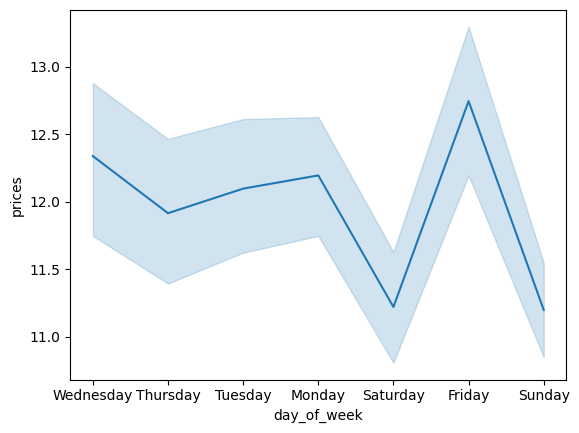

In [57]:
sns.lineplot(data = cust_merged, x = 'day_of_week', y = 'prices')

<Axes: title={'center': 'Orders per Day of the Week and Marital Status'}, xlabel='Number of Customers', ylabel='Day and Status'>

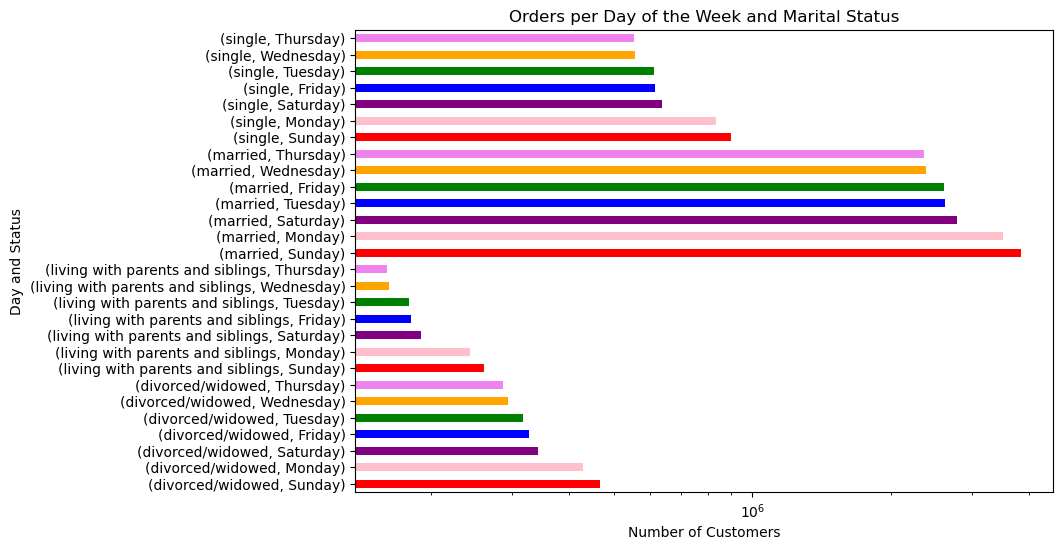

In [58]:
# Comparison of marital status and orders through the days of the week
barh_mar_day = cust_merged.groupby('marital_status')['day_of_week'].value_counts().plot(kind= 'barh', \
                        color = ['red', 'pink', 'purple', 'blue', 'green', 'orange', 'violet'], title='Orders per Day of the Week and Marital Status', xlabel='Number of Customers', \
                        ylabel='Day and Status', logx=True, figsize=(9,6))
barh_mar_day

### The majority of orders are on a Monday by married couples. Married couples occupy the highest number orders each day of the week. 

 ## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### Age_Category

In [59]:
cust_merged.groupby('product_name').agg({'prices' : 'mean'})

,prices
product_name,
#2 Coffee Filters,11.0
#2 Cone White Coffee Filters,5.7
#2 Mechanical Pencils,9.2
#4 Natural Brown Coffee Filters,2.5
#NAME?,3.6
...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,5.4
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,5.2
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,3.5


In [60]:
# Aggregate on prices within the age category
cust_merged.groupby('age_category').agg({'prices' : ['mean', 'min', 'max']})

prices              
                   mean  min      max
age_category                         
Senior        11.643426  1.0  99999.0
middle_age    11.693006  1.0  99999.0
older_adult   12.214558  1.0  99999.0
young_adult   12.362939  1.0  99999.0

Text(0.5, 0, 'Price')

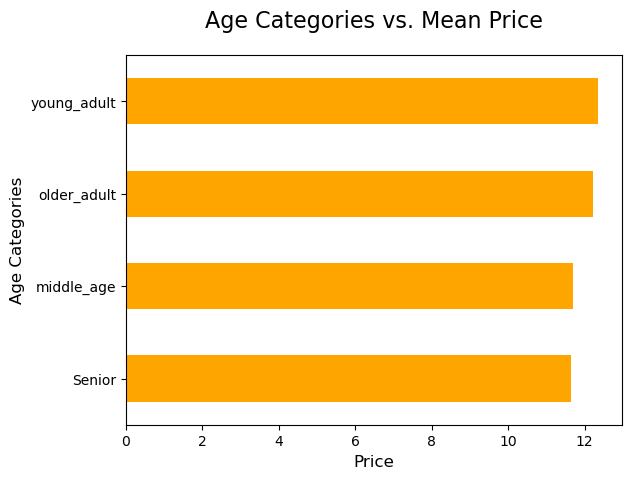

In [61]:
age_category_mean = cust_merged.groupby('age_category').agg({'prices' : ['mean']})

bar_age_category_mean = age_category_mean.plot(kind = 'barh', color= 'orange', legend='')
plt.title('Age Categories vs. Mean Price', fontsize = 16, pad=20)
plt.ylabel('Age Categories', fontsize = 12)
plt.xlabel('Price',  fontsize = 12)

Young_adult and older_adult pays more for products than middle_age and Senior.

In [62]:
# Aggregate on days since the prior order within the age category
cust_merged.groupby('age_category').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
age_category                                  
Senior                    11.091039  0.0  30.0
middle_age                11.142360  0.0  30.0
older_adult               11.123900  0.0  30.0
young_adult               11.065327  0.0  30.0

No difference in the mean noted

## Income_Category

In [63]:
# Aggregate prices column within the income category
cust_merged.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
income_category                         
Low_income        7.086992  1.0  14900.0
Middle_income     9.405480  1.0  99999.0
Upper_income     23.476340  1.0  99999.0

Text(0.5, 0, 'Price')

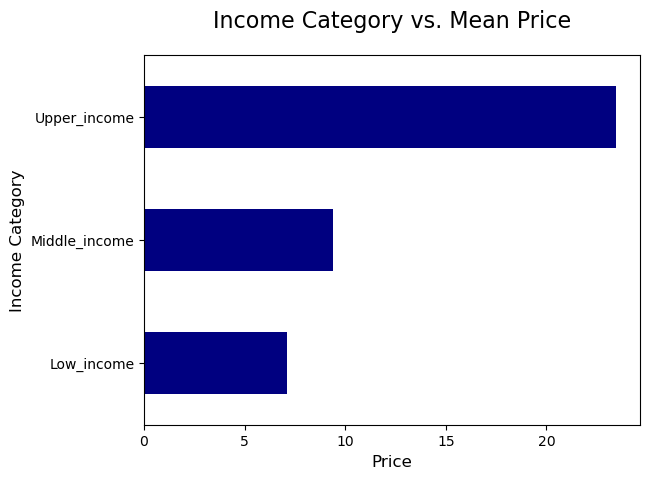

In [64]:
income_category_mean = cust_merged.groupby('income_category').agg({'prices' : ['mean']})

bar_income_category_mean = income_category_mean.plot(kind = 'barh', color= 'navy', legend='')
plt.title('Income Category vs. Mean Price', fontsize = 16, pad=20)
plt.ylabel('Income Category', fontsize = 12)
plt.xlabel('Price',  fontsize = 12)

The upper income category pays more for products than other categories

In [65]:
# Aggregate days since the prior order within the income category
cust_merged.groupby('income_category').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
income_category                                  
Low_income                   11.432905  0.0  30.0
Middle_income                11.038606  0.0  30.0
Upper_income                 11.026930  0.0  30.0

No significant difference in the mean

## Number of Dependants

In [66]:
# Aggregate the prices column within the number of dependants
cust_merged.groupby('dependants').agg({'prices' : ['mean', 'min', 'max']})

prices              
                 mean  min      max
dependants                         
0           12.142524  1.0  99999.0
1           11.544088  1.0  99999.0
2           12.361983  1.0  99999.0
3           11.607338  1.0  99999.0

No difference in the mean

In [67]:
# Aggregate days since the prior order within the number of dependants
cust_merged.groupby('dependants').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                             mean  min   max
dependants                                  
0                       11.084925  0.0  30.0
1                       11.110340  0.0  30.0
2                       11.125871  0.0  30.0
3                       11.120910  0.0  30.0

No difference in the mean

## Departments

In [68]:
# Aggregate prices within the department
cust_merged.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
department                              
alcohol           8.154774  1.0     15.0
babies            7.637562  1.0     15.0
bakery            7.855951  1.0     15.0
beverages         7.685865  1.0     15.0
breakfast         8.028704  1.0     14.9
bulk              8.353866  1.4     14.1
canned goods      7.545987  1.0     15.0
dairy eggs       33.019046  1.0  99999.0
deli              7.785115  1.0     15.0
dry goods pasta   7.350714  1.0     15.0
frozen            7.736286  1.0     15.0
household         7.375966  1.0     15.0
international     7.679653  1.0     15.0
meat seafood     16.298697  8.0     25.0
missing           8.649393  1.0     15.0
other             7.011988  1.1     15.0
pantry            8.009220  1.0     20.0
personal care     7.997522  1.0     15.0
pets              7.882441  1.0     15.0
produce           7.982416  1.0     15.0
snacks            4.275919  1.6      7.0

In [69]:
for x in cust_merged.index:
  if cust_merged.loc[x, 'prices'] > 99.0:
    cust_merged.loc[x,  'prices'] = 99.0

In [70]:
cust_merged.groupby('department').agg({'prices' : ['max']})

,prices
,max
department,
alcohol,15.0
babies,15.0
bakery,15.0
beverages,15.0
breakfast,14.9
bulk,14.1
canned goods,15.0
dairy eggs,99.0


Text(0.5, 0, 'Price')

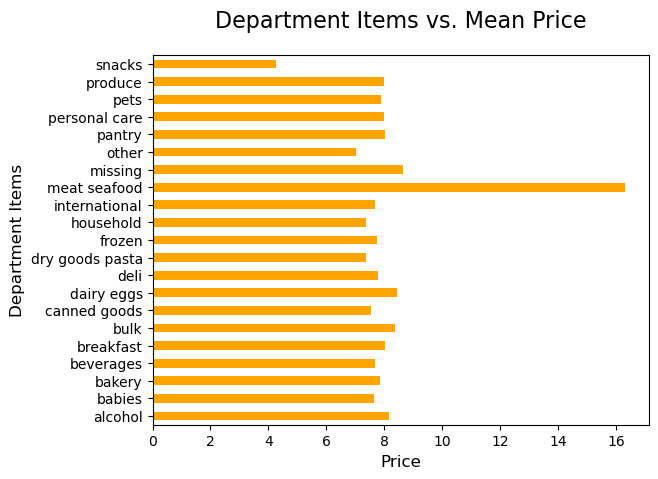

In [71]:
# Show the prices of unique deparment items mean
unique_item_mean = cust_merged.groupby('department').agg({'prices' : ['mean']})

bar_unique_item_mean = unique_item_mean.plot(kind = 'barh', color= 'orange', legend='')
plt.title('Department Items vs. Mean Price', fontsize = 16, pad=20)
plt.ylabel('Department Items', fontsize = 12)
plt.xlabel('Price',  fontsize = 12)

In [72]:
cust_merged.groupby('department').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
department                                       
alcohol                      10.342164  0.0  30.0
babies                       10.013308  0.0  30.0
bakery                       11.098518  0.0  30.0
beverages                    11.057547  0.0  30.0
breakfast                    11.314372  0.0  30.0
bulk                         10.080961  0.0  30.0
canned goods                 11.663470  0.0  30.0
dairy eggs                   10.995175  0.0  30.0
deli                         11.349476  0.0  30.0
dry goods pasta              11.772201  0.0  30.0
frozen                       11.739331  0.0  30.0
household                    12.018228  0.0  30.0
international                11.290343  0.0  30.0
meat seafood                 11.438971  0.0  30.0
missing                      10.233863  0.0  30.0
other                        10.976753  0.0  30.0
pantry                       11.175349  0.0  30.0
personal care                11.610516  0.0  30.0
pets                         11.856249  0.0  30.0
produce                      10.857868  0.0  30.0
snacks                       10.960905  0.0  30.0

Text(0.5, 0, 'Days Since Prior Order')

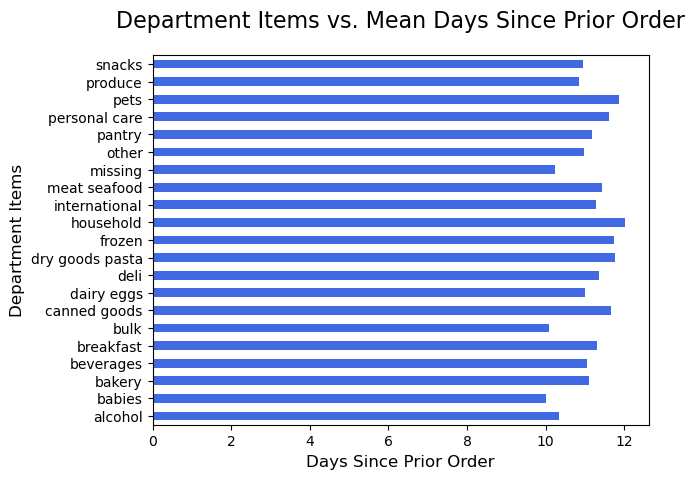

In [73]:
# Show the days since prior order of unique deparment items mean
unique_item_mean = cust_merged.groupby('department').agg({'days_since_prior_order' : ['mean']})

bar_unique_item_mean_dspo = unique_item_mean.plot(kind = 'barh', color= 'royalblue', legend= '')
plt.title('Department Items vs. Mean Days Since Prior Order', fontsize = 16, pad=20)
plt.ylabel('Department Items', fontsize = 12)
plt.xlabel('Days Since Prior Order',  fontsize = 12)

In [74]:
# Determine the order frequency by department
order_freq_by_dept = cust_merged.groupby('department').days_since_prior_order.mean().sort_values()
order_freq_by_dept

department
babies             10.013308
bulk               10.080961
missing            10.233863
alcohol            10.342164
produce            10.857868
snacks             10.960905
other              10.976753
dairy eggs         10.995175
beverages          11.057547
bakery             11.098518
pantry             11.175349
international      11.290343
breakfast          11.314372
deli               11.349476
meat seafood       11.438971
personal care      11.610516
canned goods       11.663470
frozen             11.739331
dry goods pasta    11.772201
pets               11.856249
household          12.018228
Name: days_since_prior_order, dtype: float64

<Axes: title={'center': 'Days Since Prior Order by Department'}, xlabel='Days Since Prior Order', ylabel='Department'>

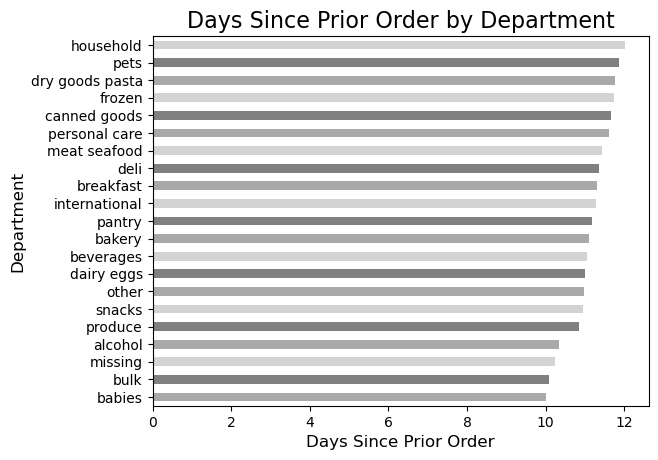

In [75]:
order_freq_by_dept_barh = cust_merged.groupby('department').days_since_prior_order.mean().sort_values().plot(kind='barh', color=['darkgrey', 'grey', 'lightgrey'])

plt.title("Days Since Prior Order by Department", fontsize = '16')
plt.ylabel('Department', fontsize = 12)
plt.xlabel('Days Since Prior Order',  fontsize = 12)

order_freq_by_dept_barh

In [76]:
department_freq = pd.crosstab(cust_merged['department'], cust_merged['freq_flag'], dropna = False)
department_freq

freq_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,93493,13072,27894
babies,290541,25375,63039
bakery,709700,103051,224662
beverages,1618780,243201,519989
breakfast,417943,64011,137058
bulk,23109,2478,5366
canned goods,606670,109487,223805
dairy eggs,3335345,452266,999564
deli,620063,97636,209571


<Axes: title={'center': 'Customer Frequency in Each Department'}, xlabel='Frequency', ylabel='Department'>

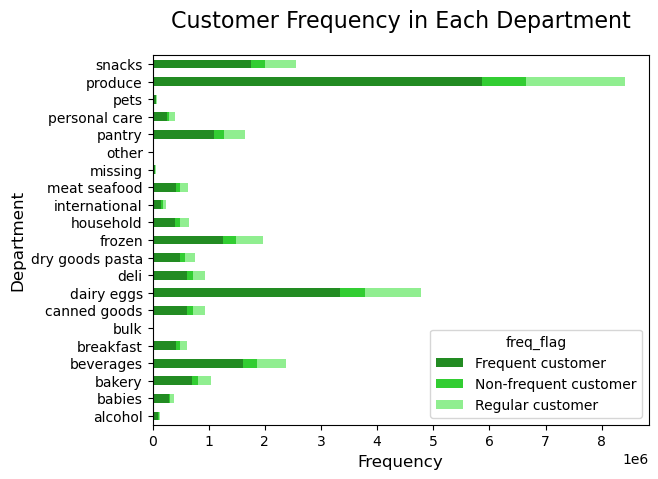

In [77]:
bar_department_freq = department_freq.plot(kind = 'barh', stacked = 'True', color= ['forestgreen', 'limegreen', 'lightgreen'])
plt.title('Customer Frequency in Each Department', fontsize = 16, pad=20)
plt.ylabel('Department', fontsize = 12)
plt.xlabel('Frequency',  fontsize = 12)

bar_department_freq

The frequent customer in the produce department had the highest frequency of days since the prior order.

## Meat/Seafood Product Consumers

In [95]:
# Produce purchasers expenditure aggregation
cust_merged.groupby('meat_sea_purchase').agg({'prices' : ['mean', 'min', 'max']})

prices           
                        mean  min   max
meat_sea_purchase                      
No                  7.616829  1.0  99.0
Yes                16.298697  8.0  25.0

Text(0.5, 0, 'Purchased Meat/Seafood Products')

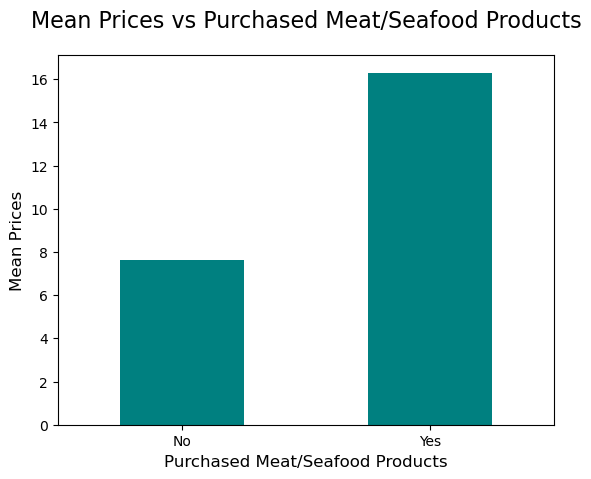

In [100]:
# Isolate the mean and plot

meat_sea_prices_mean = cust_merged.groupby('meat_sea_purchase').agg({'prices' : ['mean']})

bar_meat_sea_prices_mean = meat_sea_prices_mean.plot(kind = 'bar', rot = 0, color= 'teal', legend=None)
plt.title('Mean Prices vs Purchased Meat/Seafood Products', fontsize = 16, pad=20)
plt.ylabel('Mean Prices', fontsize = 12)
plt.xlabel('Purchased Meat/Seafood Products',  fontsize = 12)

In [96]:
cust_merged.groupby('meat_sea_purchase').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
meat_sea_purchase                                  
No                             11.103188  0.0  30.0
Yes                            11.438971  0.0  30.0

Text(0.5, 0, 'Purchased Meat/Seafood Products')

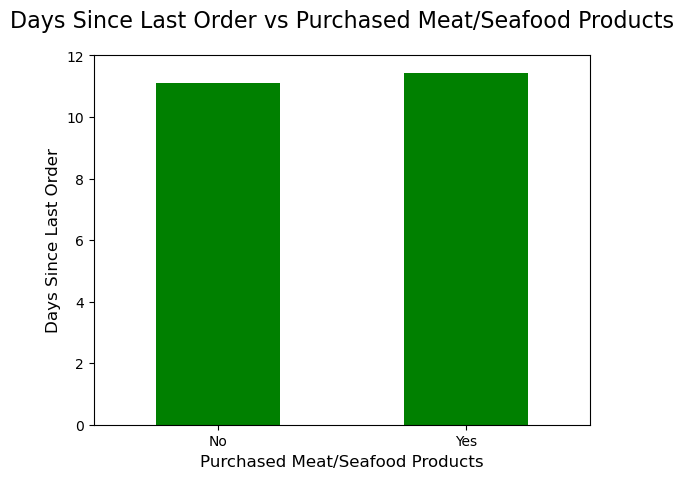

In [101]:
# Isolate the mean and plot

meat_sea_prior_order_mean = cust_merged.groupby('meat_sea_purchase').agg({'days_since_prior_order' : ['mean']})

bar_meat_sea_prior_order_mean = meat_sea_prior_order_mean.plot(kind = 'bar', rot = 0, color= 'green', legend=None)
plt.title('Days Since Last Order vs Purchased Meat/Seafood Products', fontsize = 16, pad=20)
plt.ylabel('Days Since Last Order', fontsize = 12)
plt.xlabel('Purchased Meat/Seafood Products',  fontsize = 12)

Text(0.5, 1.0, 'Customers Who Purchase Meat/Seafood Products')

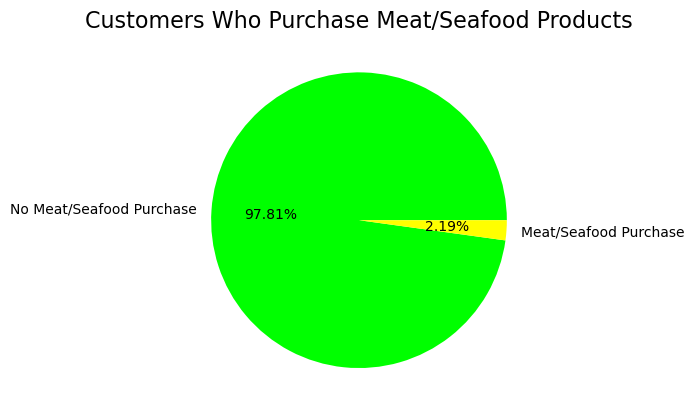

In [97]:
# Pie chart for meat/seafood purchases

meat_sea_pie = cust_merged['meat_sea_purchase'].value_counts().plot.pie(labels = ['No Meat/Seafood Purchase', 'Meat/Seafood Purchase'], autopct=('%.2f%%'), colors = ['lime', 'yellow'], label = '')
#meat_sea_purchase_pie.legend( loc = 'lower right')
plt.title("Customers Who Purchase Meat/Seafood Products", fontsize = '16')


Meat/Seafood purchases is only 2.19% of the overall purchases thorughout the departments

## Baby Product Purchases

In [99]:
# Baby product purchasers frequency aggregation

cust_merged.groupby('baby_purchase').agg({'prices' : ['mean', 'min', 'max']})

prices           
                   mean  min   max
baby_purchase                     
No             7.808799  1.0  99.0
Yes            7.637562  1.0  15.0

Text(0.5, 0, 'Purchased Baby Products')

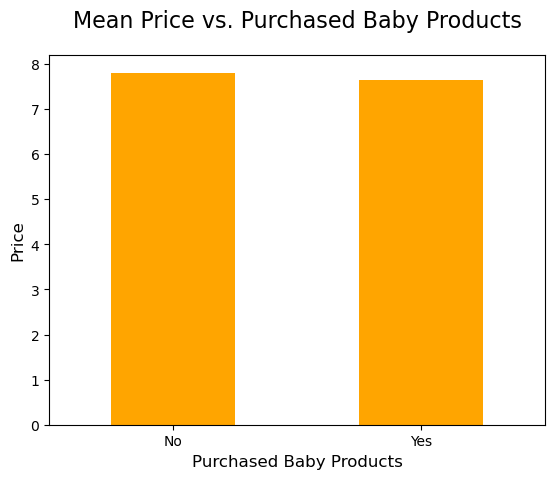

In [102]:
 # Isolate the mean and plot

baby_prices_mean = cust_merged.groupby('baby_purchase').agg({'prices' : ['mean']})

bar_baby_prices_mean = baby_prices_mean.plot(kind = 'bar', rot = 0, color= 'orange', legend=None)
plt.title('Mean Price vs. Purchased Baby Products', fontsize = 16, pad=20)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Purchased Baby Products',  fontsize = 12)

In [86]:
cust_merged.groupby('baby_purchase').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
baby_purchase                                  
No                         11.125224  0.0  30.0
Yes                        10.013308  0.0  30.0

Text(0.5, 0, 'Purchased Baby Products')

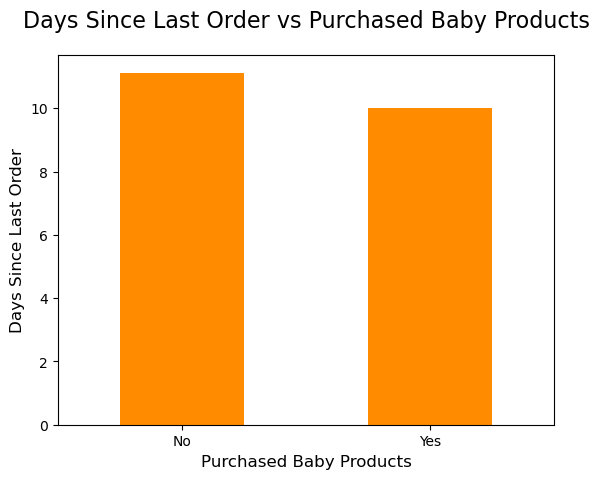

In [103]:
# Isolate the mean and plot

baby_prior_order_mean = cust_merged.groupby('baby_purchase').agg({'days_since_prior_order' : ['mean']})

bar_baby_prior_order_mean = baby_prior_order_mean.plot(kind = 'bar', rot = 0, color= 'darkorange', legend=None)
plt.title('Days Since Last Order vs Purchased Baby Products', fontsize = 16, pad=20)
plt.ylabel('Days Since Last Order', fontsize = 12)
plt.xlabel('Purchased Baby Products',  fontsize = 12)

Text(0.5, 1.0, 'Customers Who Purchase Baby Products')

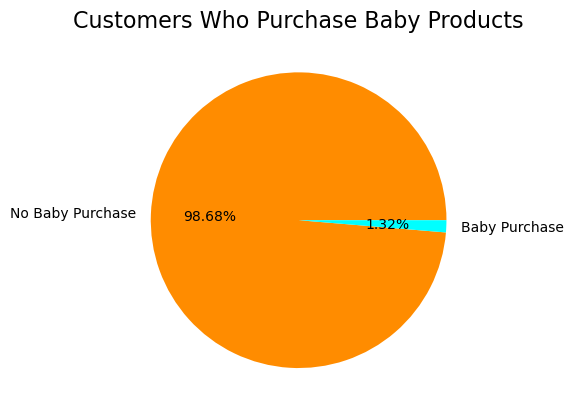

In [115]:
# Pie chart for baby product purchases

baby_purchase_pie = cust_merged['baby_purchase'].value_counts().plot.pie(labels = ['No Baby Purchase', 'Baby Purchase'], autopct=('%.2f%%'), colors = ['darkorange', 'cyan'], label = '')
#baby_purchase_pie.legend( loc = 'lower right')
plt.title("Customers Who Purchase Baby Products", fontsize = '16')


Baby products are purchased 1.32% out of the rest of the departments

## International Product Purchases

In [104]:
# international purchasers expenditure aggregation
cust_merged.groupby('international_purchase').agg({'prices' : ['mean', 'min', 'max']})

prices           
                            mean  min   max
international_purchase                     
No                      7.807592  1.0  99.0
Yes                     7.679653  1.0  15.0

Text(0.5, 0, 'Purchased International Products')

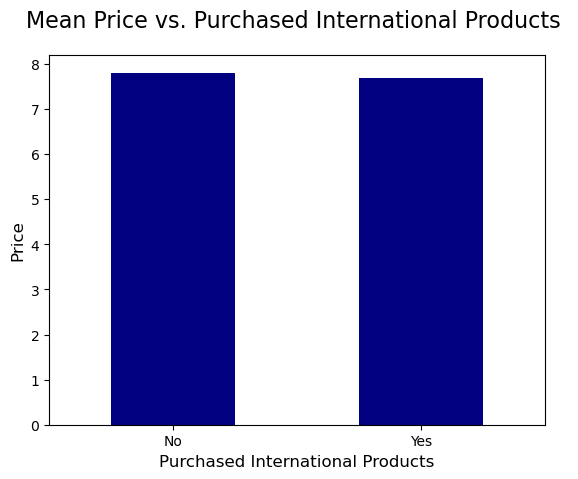

In [107]:
# Isolate the mean and plot

international_prices_mean = cust_merged.groupby('international_purchase').agg({'prices' : ['mean']})

bar_international_prices_mean = international_prices_mean.plot(kind = 'bar', rot = 0, color= 'navy', legend=None)
plt.title('Mean Price vs. Purchased International Products ', fontsize = 16, pad=20)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Purchased International Products',  fontsize = 12)

In [108]:
# International purchasers frequency aggregation

cust_merged.groupby('international_purchase').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                         mean  min   max
international_purchase                                  
No                                  11.109028  0.0  30.0
Yes                                 11.290343  0.0  30.0

Text(0.5, 0, 'Purchased International Products')

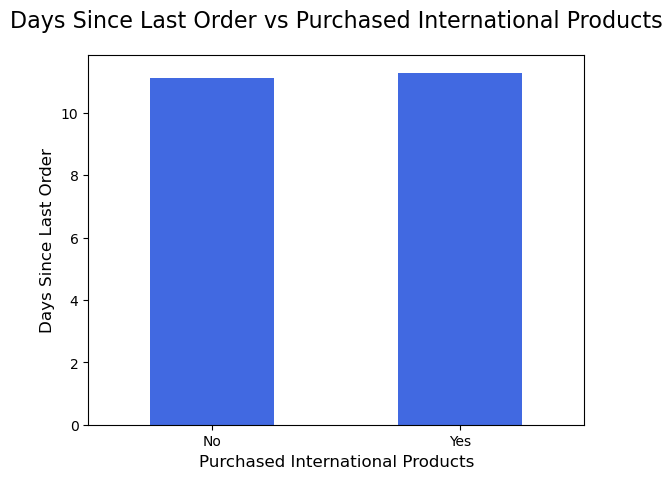

In [110]:
# Isolate the mean and plot

international_prior_mean = cust_merged.groupby('international_purchase').agg({'days_since_prior_order' : ['mean']})

bar_international_prior_mean = international_prior_mean.plot(kind = 'bar', rot = 0, color= 'royalblue', legend=None)
plt.title('Days Since Last Order vs Purchased International Products', fontsize = 16, pad=20)
plt.ylabel('Days Since Last Order', fontsize = 12)
plt.xlabel('Purchased International Products',  fontsize = 12)

Text(0.5, 1.0, 'Customers Who Purchase International Products')

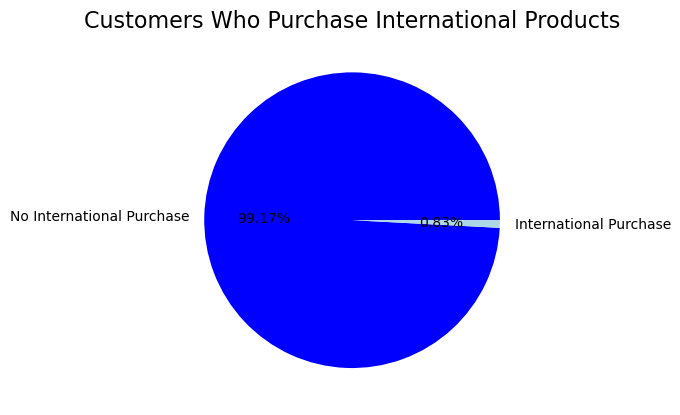

In [119]:
# Pie chart for interantional purchases

international_purchase_pie = cust_merged['international_purchase'].value_counts().plot.pie(labels = ['No International Purchase', 'International Purchase'], autopct=('%.2f%%'), colors = ['blue', 'lightblue'], label = '')
#international_purchase_pie.legend( loc = 'lower right')
plt.title("Customers Who Purchase International Products", fontsize = '16')


International Products are purchased at 0.83% compared to the overall departments purchases.

In [120]:
dairy_eggs_region = pd.crosstab(cust_merged['Region'], cust_merged['dairy_eggs_purchase'], dropna = False)
dairy_eggs_region

dairy_eggs_purchase,No,Yes
Region,,
Region 1,4677151,935032
Region 2,5594773,1119201
Region 3,7502579,1505262
Region 4,6105360,1227680


<Axes: title={'center': 'Purchased Dairy Eggs per Region'}, xlabel='Region', ylabel='Purchased Dairy Eggs'>

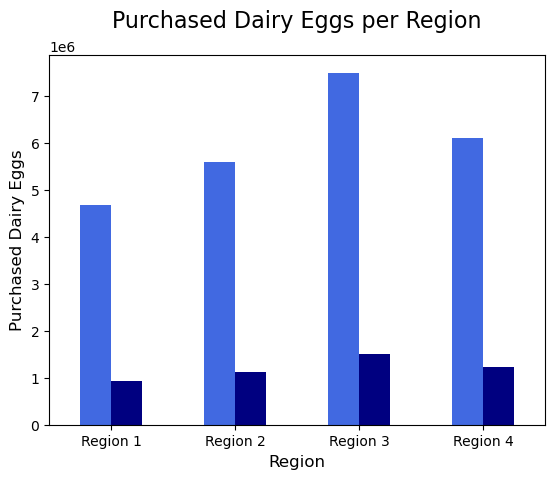

In [121]:
bar_dairy_eggs_region = dairy_eggs_region.plot(kind = 'bar', rot = 0, color= ['royalblue', 'navy'], legend='')
plt.title('Purchased Dairy Eggs per Region', fontsize = 16, pad=20)
plt.ylabel('Purchased Dairy Eggs', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)
bar_dairy_eggs_region

### Baby Product Consumers

In [122]:
# Snacks purchasers expenditure aggregation
cust_merged.groupby('baby_purchase').agg({'prices' : ['mean', 'min', 'max']})

prices           
                   mean  min   max
baby_purchase                     
No             7.808799  1.0  99.0
Yes            7.637562  1.0  15.0

Baby product purchasers have a lower mean purchase price than other purchasers

In [123]:
# Snacks purchasers frequency aggregation

cust_merged.groupby('baby_purchase').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
baby_purchase                                  
No                         11.125224  0.0  30.0
Yes                        10.013308  0.0  30.0

Baby purchasers order slightly more frequently than other purchasers

In [124]:
baby_region = pd.crosstab(cust_merged['Region'], cust_merged['baby_purchase'], dropna = False)
baby_region

baby_purchase,No,Yes
Region,,
Region 1,5537580,74603
Region 2,6625909,88065
Region 3,8886936,120905
Region 4,7237658,95382


<Axes: title={'center': 'Purchased Baby Products per Region'}, xlabel='Region', ylabel='Purchased Baby Products'>

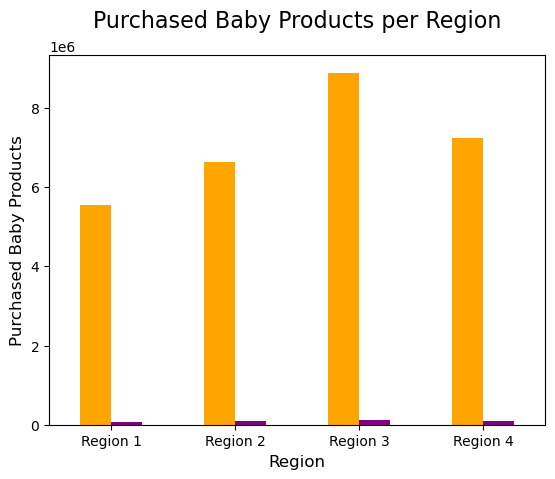

In [125]:
bar_baby_region = baby_region.plot(kind = 'bar', rot = 0, color= ['orange', 'purple'], legend='')
plt.title('Purchased Baby Products per Region', fontsize = 16, pad=20)
plt.ylabel('Purchased Baby Products', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)
bar_baby_region

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Compare customer loyalty across the region

In [126]:
loyalty_region = pd.crosstab(cust_merged['Region'], cust_merged['loyalty_flag'], dropna = False)
loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Region 1,1895649,955026,2761508
Region 2,2195876,1147523,3370575
Region 3,2971957,1521151,4514733
Region 4,2465464,1246777,3620799


<Axes: title={'center': 'Customer Loyalty in each Region'}, xlabel='Region', ylabel='Number of Customers (millions)'>

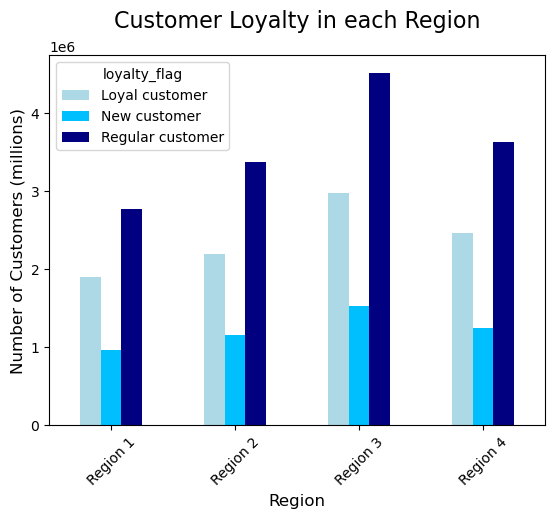

In [127]:
bar_loyalty_region = loyalty_region.plot(kind = 'bar', rot = 45, color= ['lightblue', 'deepskyblue','navy'])
plt.title('Customer Loyalty in each Region', fontsize = 16, pad=20)
plt.ylabel('Number of Customers (millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_loyalty_region

Region 3 has more loyalty customers, considerably the most regular customers, than any other region.

In [128]:
# Compare loyalty category across departments

loyalty_depart = pd.crosstab(cust_merged['department'], cust_merged['loyalty_flag'], dropna = False)
loyalty_depart

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,36558,28520,69381
babies,153588,47202,178165
bakery,352597,174340,510476
beverages,793435,401458,1187077
breakfast,204344,107615,307053
bulk,12864,4170,13919
canned goods,272876,183657,483429
dairy eggs,1695449,758357,2333369
deli,300070,159743,467457


<Axes: title={'center': 'Customer Loyalty in each Department'}, xlabel='Number of Customers (millions)', ylabel='Customer Loyalty per Department'>

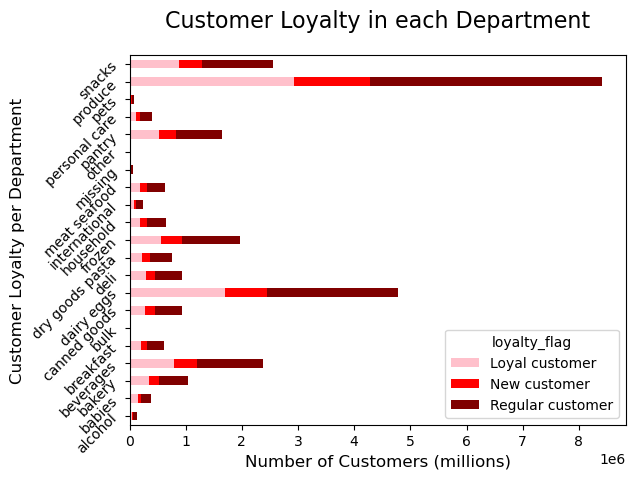

In [129]:
bar_loyalty_depart = loyalty_depart.plot(kind = 'barh', rot = 45, stacked = True, color= ['pink', 'red','maroon'])
plt.title('Customer Loyalty in each Department', fontsize = 16, pad=20)
plt.ylabel('Customer Loyalty per Department', fontsize = 12)
plt.xlabel('Number of Customers (millions)',  fontsize = 12)

bar_loyalty_depart

Customer loyalty based on departments shows that customers prefer the produce department over the beverages and snacks

## Compare customer spending across the region

In [130]:
spend_region = pd.crosstab(cust_merged['Region'], cust_merged['spend_flag'], dropna = False)
spend_region

spend_flag,High spender,Low spender
Region,,
Region 1,107770,5504413
Region 2,142511,6571463
Region 3,173120,8834721
Region 4,138778,7194262


<Axes: title={'center': 'Customer Spending in each Region'}, xlabel='Spending', ylabel='Number of Customers (millions)'>

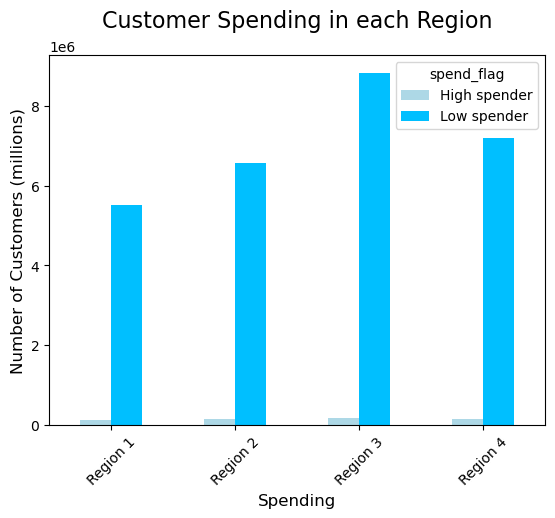

In [131]:
bar_spend_region = spend_region.plot(kind = 'bar', rot = 45, color= ['lightblue', 'deepskyblue','navy'])
plt.title('Customer Spending in each Region', fontsize = 16, pad=20)
plt.ylabel('Number of Customers (millions)', fontsize = 12)
plt.xlabel('Spending',  fontsize = 12)

bar_spend_region

The chart shows that low spenders occupy the majority of spenders in every region with the highest being region 3.

## Customer spending in each department

In [132]:
spend_depart = pd.crosstab(cust_merged['department'], cust_merged['spend_flag'], dropna = False)
spend_depart

spend_flag,High spender,Low spender
department,,
alcohol,11774,122685
babies,4037,374918
bakery,25692,1011721
beverages,54577,2327393
breakfast,13815,605197
bulk,117,30836
canned goods,18787,921175
dairy eggs,101410,4685765
deli,15293,911977


<Axes: title={'center': 'Customer Spending in each Department'}, xlabel='Number of Customers (millions)', ylabel='Spending per Department'>

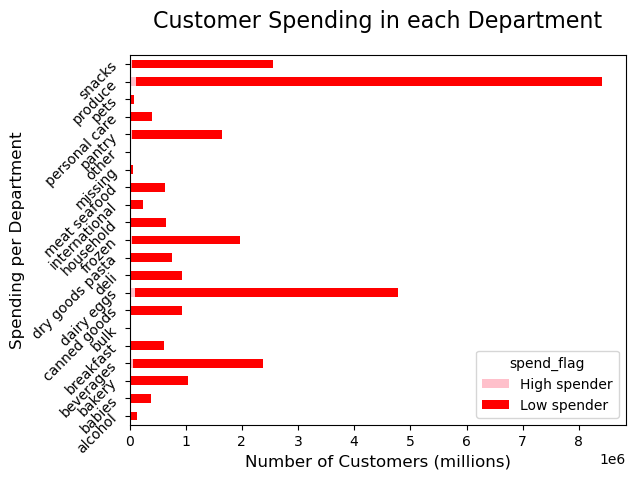

In [133]:
bar_spend_depart = spend_depart.plot(kind = 'barh', rot = 45, stacked = True, color= ['pink', 'red'])
plt.title('Customer Spending in each Department', fontsize = 16, pad=20)
plt.ylabel('Spending per Department', fontsize = 12)
plt.xlabel('Number of Customers (millions)',  fontsize = 12)

bar_spend_depart

The chart shows that the low spenders occupy the majority of spenders and the low spenders choose produce as the best way to spend their money.

## Customer activity in each region

In [134]:
activity_region = pd.crosstab(cust_merged['Region'], cust_merged['freq_flag'], dropna = False)
activity_region

freq_flag,Frequent customer,Non-frequent customer,Regular customer
Region,,,
Region 1,3807450,560566,1244167
Region 2,4537414,688115,1488445
Region 3,6164103,907801,1935937
Region 4,5017502,740249,1575289


<Axes: title={'center': 'Customer Activity in each Region'}, xlabel='Activity', ylabel='Number of Customers (millions)'>

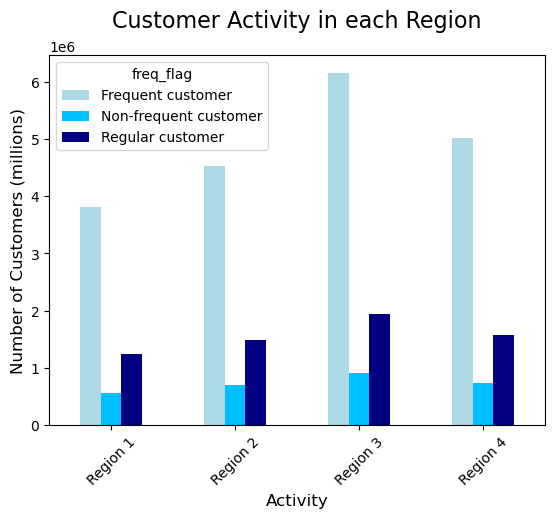

In [135]:
bar_activity_region = activity_region.plot(kind = 'bar', rot = 45, color= ['lightblue', 'deepskyblue','navy'])
plt.title('Customer Activity in each Region', fontsize = 16, pad=20)
plt.ylabel('Number of Customers (millions)', fontsize = 12)
plt.xlabel('Activity',  fontsize = 12)

bar_activity_region

The frequent customer is the most prominent in each region with region 3 being the highest.

## Customer activity in each department

In [136]:
activity_depart = pd.crosstab(cust_merged['department'], cust_merged['freq_flag'], dropna = False)
activity_depart

freq_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,93493,13072,27894
babies,290541,25375,63039
bakery,709700,103051,224662
beverages,1618780,243201,519989
breakfast,417943,64011,137058
bulk,23109,2478,5366
canned goods,606670,109487,223805
dairy eggs,3335345,452266,999564
deli,620063,97636,209571


<Axes: title={'center': 'Customer Activity in each Department'}, xlabel='Number of Customers (millions)', ylabel='Activity per Department'>

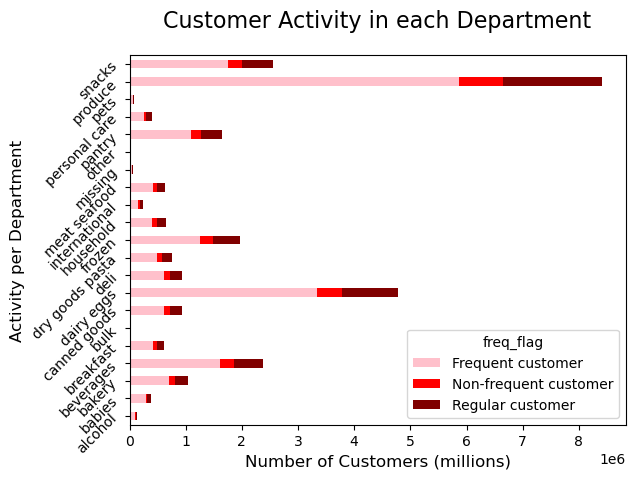

In [137]:
bar_activity_depart = activity_depart.plot(kind = 'barh', rot = 45, stacked = True, color= ['pink', 'red','maroon'])
plt.title('Customer Activity in each Department', fontsize = 16, pad=20)
plt.ylabel('Activity per Department', fontsize = 12)
plt.xlabel('Number of Customers (millions)',  fontsize = 12)

bar_activity_depart

The frequent customer is the highest in each department with produce having the highest number of frequent customers.

 ## Customers age related to region

In [138]:
age_region = pd.crosstab(cust_merged['Region'], cust_merged['age_category'], dropna = False)
age_region

age_category,Senior,middle_age,older_adult,young_adult
Region,,,,
Region 1,1947649,1295668,1746792,622074
Region 2,2269306,1557574,2155366,731728
Region 3,3071477,2140781,2776781,1018802
Region 4,2503255,1711117,2325663,793005


<Axes: title={'center': 'Customer Age in each Region'}, xlabel='Age', ylabel='Number of Customers (millions)'>

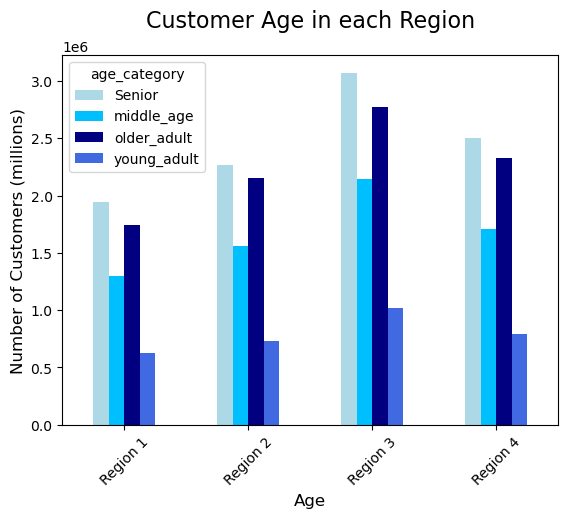

In [139]:
bar_age_region = age_region.plot(kind = 'bar', rot = 45, color= ['lightblue', 'deepskyblue','navy', 'royalblue'])
plt.title('Customer Age in each Region', fontsize = 16, pad=20)
plt.ylabel('Number of Customers (millions)', fontsize = 12)
plt.xlabel('Age',  fontsize = 12)

bar_age_region

The senior age group (60+) is the largest in all regions, but is the highest in region 3.

## Customer age group related to deparment

In [140]:
age_depart = pd.crosstab(cust_merged['department'], cust_merged['age_category'], dropna = False)
age_depart

age_category,Senior,middle_age,older_adult,young_adult
department,,,,
alcohol,43851,32087,42105,16416
babies,128053,88175,120556,42171
bakery,353370,242875,326644,114524
beverages,819351,550477,752598,259544
breakfast,210447,144716,194056,69793
bulk,10596,7230,9614,3513
canned goods,319197,220954,295769,104042
dairy eggs,1630851,1126334,1500229,529761
deli,317571,217741,290645,101313


<Axes: title={'center': 'Customer Age in each Department'}, xlabel='Number of Customers (millions)', ylabel='Departments'>

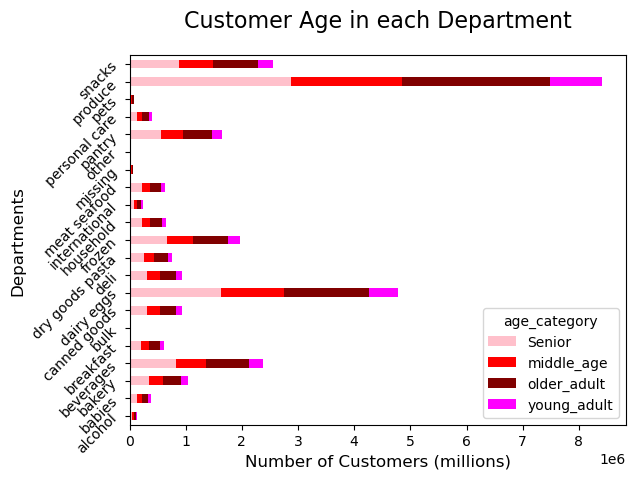

In [141]:
bar_age_depart = age_depart.plot(kind = 'barh', rot = 45, stacked = True, color= ['pink', 'red','maroon','magenta'])
plt.title('Customer Age in each Department', fontsize = 16, pad=20)
plt.ylabel('Departments', fontsize = 12)
plt.xlabel('Number of Customers (millions)',  fontsize = 12)

bar_age_depart

The chart shows the senior age group is highest amoung the age groups in each department and it is the highest in produce.

## Customer's income related to region

In [142]:
income_region = pd.crosstab(cust_merged['Region'], cust_merged['income_category'], dropna = False)
income_region

income_category,Low_income,Middle_income,Upper_income
Region,,,
Region 1,1050528,3371015,1190640
Region 2,1248817,4030682,1434475
Region 3,1737399,5420196,1850246
Region 4,1369758,4437365,1525917


<Axes: title={'center': 'Customer Income in each Region'}, xlabel='Income', ylabel='Number of Customers (millions)'>

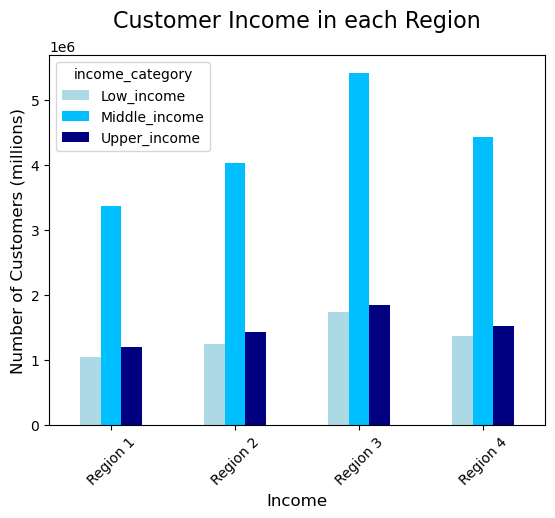

In [143]:
bar_income_region = income_region.plot(kind = 'bar', rot = 45, color= ['lightblue', 'deepskyblue','navy'])
plt.title('Customer Income in each Region', fontsize = 16, pad=20)
plt.ylabel('Number of Customers (millions)', fontsize = 12)
plt.xlabel('Income',  fontsize = 12)

bar_income_region

The chart shows that middle income is the highest in all regions and it is at its highest value in region 3.

## Customer's income related to department

In [144]:
income_depart = pd.crosstab(cust_merged['department'], cust_merged['income_category'], dropna = False)
income_depart

income_category,Low_income,Middle_income,Upper_income
department,,,
alcohol,26575,75381,32503
babies,52012,244236,82707
bakery,179381,632273,225759
beverages,554203,1348588,479179
breakfast,136490,355823,126699
bulk,6827,18367,5759
canned goods,147082,586583,206297
dairy eggs,839112,2929218,1018845
deli,172164,560572,194534


<Axes: title={'center': 'Customer Income in each Department'}, xlabel='Number of Customers (millions)', ylabel='Departments'>

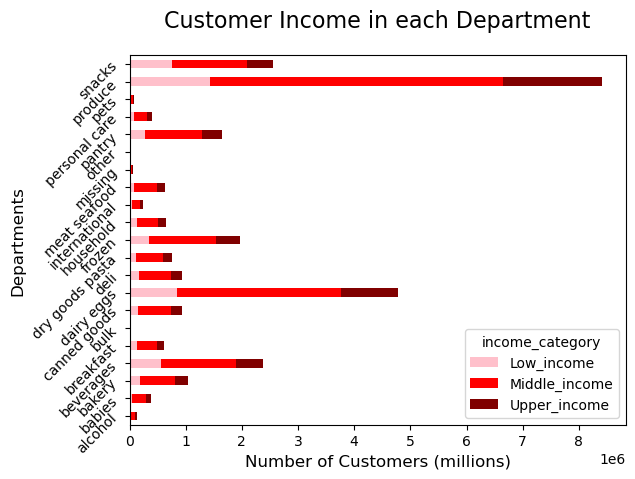

In [145]:
bar_income_depart = income_depart.plot(kind = 'barh', rot = 45, stacked = True, color= ['pink', 'red','maroon'])
plt.title('Customer Income in each Department', fontsize = 16, pad=20)
plt.ylabel('Departments', fontsize = 12)
plt.xlabel('Number of Customers (millions)',  fontsize = 12)

bar_income_depart

This chart shows the middle income is the highest in all departments and is at the highest value in the produce department.

## Customer's dependants related to region

In [146]:
dependant_region = pd.crosstab(cust_merged['Region'], cust_merged['dependants_category'], dropna = False)
dependant_region

dependants_category,Few children,Many children,No Children
Region,,,
Region 1,2811221,1415832,1385130
Region 2,3377727,1646793,1689454
Region 3,4504019,2254445,2249377
Region 4,3624901,1872016,1836123


<Axes: title={'center': 'Customer Dependants in each Region'}, xlabel='Dependants', ylabel='Number of Customers (millions)'>

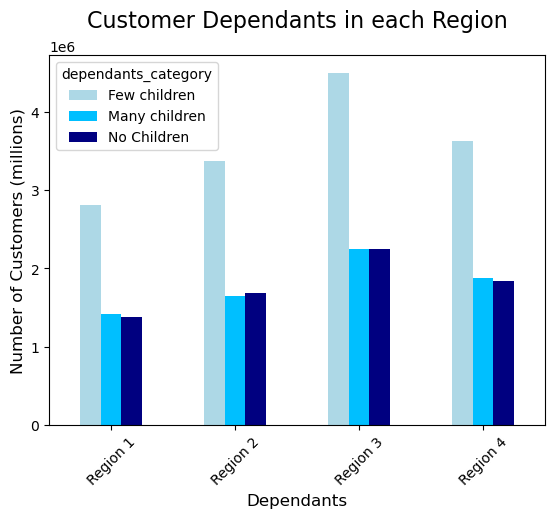

In [147]:
bar_dependant_region = dependant_region.plot(kind = 'bar', rot = 45, color= ['lightblue', 'deepskyblue','navy'])
plt.title('Customer Dependants in each Region', fontsize = 16, pad=20)
plt.ylabel('Number of Customers (millions)', fontsize = 12)
plt.xlabel('Dependants',  fontsize = 12)

bar_dependant_region

The chart shows the customers with 1 or 2 children have the highest numbers in each region and it has the highest value in region 3.

## Customer's dependants related to department

In [148]:
dependant_depart = pd.crosstab(cust_merged['department'], cust_merged['dependants_category'], dropna = False)
dependant_depart

dependants_category,Few children,Many children,No Children
department,,,
alcohol,65541,34455,34463
babies,188814,94877,95264
bakery,517318,259406,260689
beverages,1191029,592725,598216
breakfast,311457,153390,154165
bulk,15689,7877,7387
canned goods,470200,236552,233210
dairy eggs,2395430,1196800,1194945
deli,460242,233385,233643


<Axes: title={'center': 'Customers Dependants in each Department'}, xlabel='Number of Customers (millions)', ylabel='Dependants'>

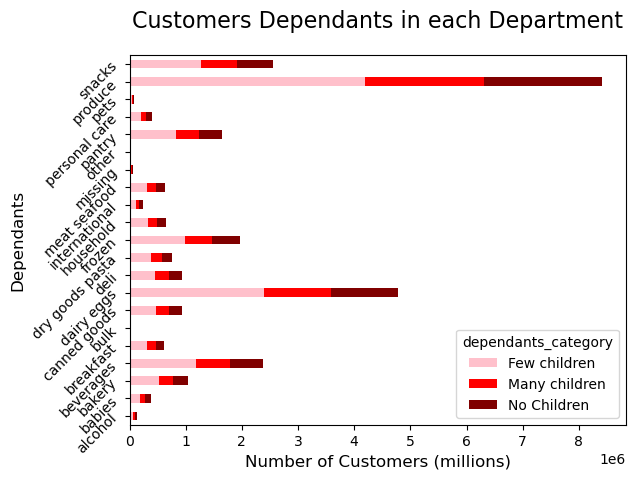

In [149]:
bar_dependant_depart = dependant_depart.plot(kind = 'barh', rot = 45, stacked = True, color= ['pink', 'red','maroon'])
plt.title('Customers Dependants in each Department', fontsize = 16, pad=20)
plt.ylabel('Dependants', fontsize = 12)
plt.xlabel('Number of Customers (millions)',  fontsize = 12)

bar_dependant_depart

The chart shows the number of customers with dependants. The customers with 1 or 2 children have the highest value in all three departments and is at the highest value in the produce department.

<Axes: title={'center': 'Price Range Categories'}, xlabel='Frequency (millions)', ylabel='Price Range Categories'>

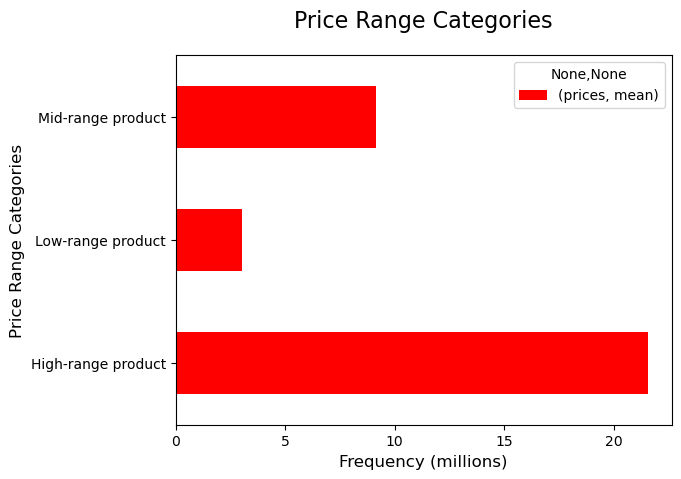

In [150]:
price_range = cust_merged.groupby('price_range_loc').agg({'prices' : ['mean']})
bar_price = price_range.plot(kind = 'barh', color= ['red', 'blue', 'green'])
plt.title('Price Range Categories', fontsize = 16, pad=20)
plt.ylabel('Price Range Categories', fontsize = 12)
plt.xlabel('Frequency (millions)',  fontsize = 12)

bar_price

In [151]:
cust_merged.groupby('price_range_loc').agg({'prices' : ['mean', 'min', 'max']})

prices            
                         mean   min   max
price_range_loc                          
High-range product  21.558019  15.1  99.0
Low-range product    3.023471   1.0   5.0
Mid-range product    9.134455   5.2  14.0

In [152]:
act_loyal = pd.crosstab(index=cust_merged['loyalty_flag'],
                        columns=cust_merged['freq_flag'])
act_loyal

freq_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,9525676,0,3270
New customer,1290437,2101077,1478963
Regular customer,8710356,795654,4761605


<Axes: title={'center': 'Customer Loyalty vs Order Frequency'}, xlabel='Number of Customers (millions)', ylabel='Loyalty Category'>

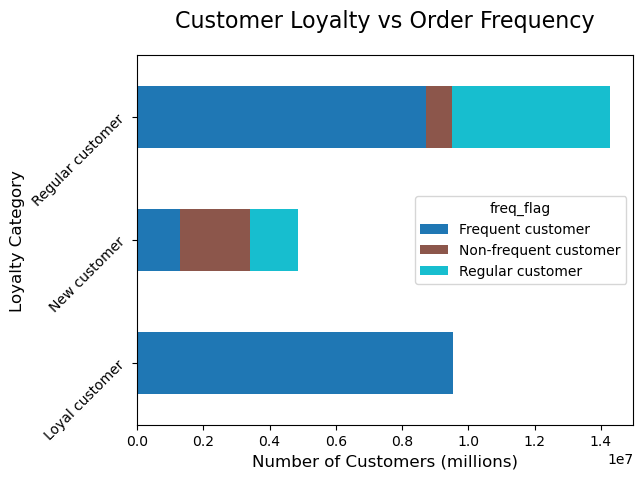

In [153]:
bar_act_loyal = act_loyal.plot(kind = 'barh', rot = 45, stacked = True, colormap = 'tab10')
plt.title('Customer Loyalty vs Order Frequency', fontsize = 16, pad=20)
plt.ylabel('Loyalty Category', fontsize = 12)
plt.xlabel('Number of Customers (millions)',  fontsize = 12)

bar_act_loyal

## Overall observation:
In the loyalty category, the regular customers ranked the highest in region 3 and in the produce department.   
In the spending category, the low spenders ranked the highest in region 3 and in the produce department.  
In the activity category, the frequent customers ranked the highest in region 3 and in the produce department.  
In the age category, the senior customers ranked the highest in region 3 and in the produce department.  
In the income category, the middle income customers ranked the highest in region 3 and in the produce department.  
In the dependants category, the customers with few children (1-2) ranked the highest in region 3 and in the produce department.  
The connection between all categories is they all ranked highest in region 3 and in the produce department.

##  9. Produce suitable charts to illustrate your results and export them in your project folder.

In [154]:
bar1_reg_spend.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar1_reg_spend.png'), \
                                                  bbox_inches = 'tight')

In [155]:
barh_cust_per_age.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_barh_cust_per_age.png'), \
                                                  bbox_inches = 'tight')

In [156]:
barh_income_cust.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_barh_income_cust.png'), \
                                                  bbox_inches = 'tight')

In [157]:
barh_dpend_cust.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_barh_dpend_cust.png'), \
                                                  bbox_inches = 'tight')

In [158]:
bar_time.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_time_freq.png'), \
                                                  bbox_inches = 'tight')

In [159]:
bar_mar.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_marital_stats.png'), \
                                                  bbox_inches = 'tight')

In [160]:
barh_mar_time.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_barh_marital_time_orders.png'), \
                                                  bbox_inches = 'tight')

In [161]:
bar_day.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_dow_orders.png'), \
                                                  bbox_inches = 'tight')

In [162]:
barh_mar_day.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_marital_orders_dow.png'), \
                                                  bbox_inches = 'tight')

In [163]:
bar_unique_item_mean.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_unique_item_mean.png'), \
                                                  bbox_inches = 'tight')

In [164]:
bar_unique_item_mean_dspo.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_unique_item_mean_dspo.png'), \
                                                  bbox_inches = 'tight')

In [165]:
order_freq_by_dept_barh.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_order_freq_by_dept_barh.png'), \
                                                  bbox_inches = 'tight')

In [166]:
bar_meat_sea_prices_mean.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_produce_prices_mean.png'), \
                                                  bbox_inches = 'tight')

In [167]:
bar_meat_sea_prior_order_mean.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_produce_prior_order_mean.png'), \
                                                  bbox_inches = 'tight')

In [168]:
bar_baby_prices_mean.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_bev_prices_mean.png'), \
                                                  bbox_inches = 'tight')

In [169]:
bar_baby_prior_order_mean.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_bev_prior_order_mean.png'), \
                                                  bbox_inches = 'tight')

In [170]:
bar_international_prices_mean.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_snacks_prices_mean.png'), \
                                                  bbox_inches = 'tight')

In [171]:
bar_international_prior_mean.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_snacks_prior_order_mean.png'), \
                                                  bbox_inches = 'tight')

In [172]:
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_loyalty_region.png'), \
                                                  bbox_inches = 'tight')

In [173]:
bar_loyalty_depart.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_loyalty_depart.png'), \
                                                  bbox_inches = 'tight')

In [174]:
bar_spend_region.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_spend_region.png'), \
                                                  bbox_inches = 'tight')

In [175]:
bar_spend_depart.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_spend_depart.png'), \
                                                  bbox_inches = 'tight')

In [176]:
bar_activity_region.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_activity_region.png'), \
                                                  bbox_inches = 'tight')

In [177]:
bar_activity_depart.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_activity_depart.png'), \
                                                  bbox_inches = 'tight')

In [178]:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_age_region.png'), \
                                                  bbox_inches = 'tight')

In [179]:
bar_age_depart.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_age_depart.png'), \
                                                  bbox_inches = 'tight')

In [180]:
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_income_region.png'), \
                                                  bbox_inches = 'tight')

In [181]:
bar_income_depart.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_income_depart.png'), \
                                                  bbox_inches = 'tight')

In [182]:
bar_dependant_region.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_dependant_region.png'), \
                                                  bbox_inches = 'tight')

In [183]:
bar_dependant_depart.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_bar_dependant_depart.png'), \
                                                  bbox_inches = 'tight')

In [188]:
meat_sea_pie.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_meat_sea_category_pie.png'), bbox_inches = 'tight')

In [189]:
baby_purchase_pie.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_baby_category_pie.png'), bbox_inches = 'tight')

In [190]:
international_purchase_pie.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', '4.10_international_category_pie.png'), bbox_inches = 'tight')

In [191]:
cust_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_instacart_customers.pkl'))